<a href="https://colab.research.google.com/github/AlonsoLoreto/Actividad-7-Regresi-n-Log-stica-_A01706755/blob/main/Actividad_7_(Regresi%C3%B3n_Log%C3%ADstica)_A01706755.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [591]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as special
from scipy.optimize import curve_fit
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [592]:
df= pd.read_csv('cuentas_credicel.csv', encoding = 'latin')
df.head(20)

<ipython-input-592-944aad52521b>:1: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv('cuentas_credicel.csv', encoding = 'latin')


,folio,tag,folio_solicitud,fecha,marca,modelo,plazo,precio,enganche,descuento,...,porc_eng,limite_credito,semana_actual,cp_cliente,edad_cliente,cd_cliente,edo_cliente,cd_venta,edo_venta,curp
0,3,HDNAWQ3A,30,12/11/21 19:00,ZTE,Blade A3 2020 RO B,26S,1949.0,780.0,0.0,...,40.02,5000,26,NaN,23.0,0,0,Tantoyuca,Veracruz,AEVM980413MVZNDR02
1,4,M418YNR4,33,12/11/21 19:15,MOTOROLA,LTE XT2097-12 E7I POWER Azul,13S,2999.0,1050.0,0.0,...,35.01,6000,13,NaN,60.0,PUEBLA,PUE.,Heroica Puebla de Zaragoza,Puebla,ZALC610119MPLPRR07
2,5,SZ7V3NZT,37,13/11/21 14:13,ZTE,BLADE A3 2020 Gris,13S,1959.0,490.0,0.0,...,25.01,0,74,NaN,58.0,TANTOYUCA,VER.,0,0,0
3,6,9I08UIQZ,38,13/11/21 15:45,ZTE,BLADE A3 2020 Gris,13S,1959.0,490.0,0.0,...,25.01,7000,13,NaN,42.0,AMXTLAN PUE,NaN,Zacatlan,Puebla,SAMJ790115MPLNRS02
4,7,JMF4LKYU,44,13/11/21 16:10,MOTOROLA,G10 B,39S,4299.0,1075.0,0.0,...,25.01,7000,74,NaN,33.0,TANTOYUCA,VER.,Tantoyuca,Veracruz,TEHF880707HVZRRR07
5,8,FOBQ8A27,49,13/11/21 16:50,MOTOROLA,LTE XT2097-12 E7I POWER Azul,26S,2999.0,750.0,0.0,...,25.01,7000,26,NaN,38.0,PAPANTLA,VER.,Papantla,Veracruz,FAAE830916MVZRRG00
6,9,UND81DCF,50,13/11/21 17:19,MOTOROLA,E7I POWER 2+32 GB AZUL B,26S,2999.0,900.0,0.0,...,30.01,6000,26,NaN,21.0,TANTOYUCA,VER.,Tantoyuca,Veracruz,JAPC000801HVZCRSA0
7,10,LMC1PBLV,54,14/11/21 11:19,MOTOROLA,LTE XT2128-1 G20 Rosa,13S,3999.0,1500.0,0.0,...,37.51,7000,13,NaN,45.0,PAPANTLA,VER.,Papantla,Veracruz,HUTE760223HVZDJD06
8,11,5SDZN7O1,59,14/11/21 13:34,KODAK,LTE SEREN D60LX Azul,26S,2889.0,1000.0,0.0,...,34.61,7000,26,NaN,36.0,TANTOYUCA,VER.,Tantoyuca,Veracruz,CUAN850601HVZRLS03
9,12,R523EMQT,62,14/11/21 14:54,NOKIA,NOKIA 2.4 3+64 GB GRIS B,26S,2999.0,750.0,0.0,...,25.01,7000,74,NaN,47.0,TEZIUTLAN,PUE.,Teziutlan,Puebla,LAMG740108MPLRXD08


In [593]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22735 entries, 0 to 22734
Data columns (total 39 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   folio               22735 non-null  int64  
 1   tag                 22735 non-null  object 
 2   folio_solicitud     22735 non-null  int64  
 3   fecha               22735 non-null  object 
 4   marca               22735 non-null  object 
 5   modelo              22735 non-null  object 
 6   plazo               22735 non-null  object 
 7   precio              22735 non-null  float64
 8   enganche            22735 non-null  float64
 9   descuento           22735 non-null  float64
 10  semana              22735 non-null  int64  
 11  monto_financiado    22735 non-null  float64
 12  costo_total         22735 non-null  int64  
 13  monto_accesorios    22735 non-null  float64
 14  agente_venta        22735 non-null  object 
 15  dis_venta           22735 non-null  object 
 16  stat

In [594]:
df['edad_cliente'].fillna('mode', inplace=True)
df['edo_cliente'].fillna('mode', inplace=True)
df['cd_venta'].fillna('mode', inplace=True)
df['edo_venta'].fillna('mode', inplace=True)
df['empresa'].fillna('mode', inplace=True)
df['status_cuenta'].fillna('mode', inplace=True)
df['cp_cliente'].fillna('mode', inplace=True)
df['razones_buro'].fillna('mode', inplace=True)
df['marca'].fillna('mode', inplace=True)
df['modelo'].fillna('mode', inplace=True)
df['empresa'].fillna('mode', inplace=True)

In [595]:
df = df.drop('curp', axis=1)
df = df.drop('fecha_ultimo_pago', axis=1)
df = df.drop('fecha_pago_proximo', axis=1)

In [596]:
df['limite_credito'] = df['limite_credito'].replace('SD', 0)
df['limite_credito'] = df['limite_credito'].astype(float)

In [597]:
df['fraude'].fillna('1', inplace=True)
df['reautorizacion'].fillna('1', inplace=True)

In [598]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22735 entries, 0 to 22734
Data columns (total 36 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   folio             22735 non-null  int64  
 1   tag               22735 non-null  object 
 2   folio_solicitud   22735 non-null  int64  
 3   fecha             22735 non-null  object 
 4   marca             22735 non-null  object 
 5   modelo            22735 non-null  object 
 6   plazo             22735 non-null  object 
 7   precio            22735 non-null  float64
 8   enganche          22735 non-null  float64
 9   descuento         22735 non-null  float64
 10  semana            22735 non-null  int64  
 11  monto_financiado  22735 non-null  float64
 12  costo_total       22735 non-null  int64  
 13  monto_accesorios  22735 non-null  float64
 14  agente_venta      22735 non-null  object 
 15  dis_venta         22735 non-null  object 
 16  status            22735 non-null  int64 

In [599]:
df.corr()

<ipython-input-599-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,folio,folio_solicitud,precio,enganche,descuento,semana,monto_financiado,costo_total,monto_accesorios,status,fraude,inversion,pagos_realizados,reautorizacion,puntos,riesgo,score_buro,porc_eng,limite_credito,semana_actual
folio,1.000000,0.971332,0.098971,0.124622,0.130377,0.094659,0.075446,0.027103,0.081637,-0.381641,-0.051590,-0.139744,-0.477863,-0.267134,-0.120736,0.352654,0.548206,0.069327,-0.386107,-0.819061
folio_solicitud,0.971332,1.000000,0.099934,0.121863,0.127074,0.097633,0.077342,0.029438,0.071465,-0.378045,-0.051017,-0.130940,-0.467299,-0.250896,-0.136859,0.340098,0.527624,0.063868,-0.370216,-0.796687
precio,0.098971,0.099934,1.000000,0.678519,0.009883,0.672673,0.947080,0.872403,0.019097,-0.096183,0.060723,0.004445,0.017000,-0.057546,0.073077,-0.042888,0.080220,-0.011328,0.098488,-0.030421
enganche,0.124622,0.121863,0.678519,1.000000,-0.025689,0.339912,0.408276,0.355694,0.031409,-0.032450,0.051645,-0.071798,-0.080730,-0.022209,-0.175815,0.272575,0.059764,0.676520,-0.316161,-0.094174
descuento,0.130377,0.127074,0.009883,-0.025689,1.000000,-0.026317,0.024136,0.036940,-0.006212,-0.076093,-0.035743,0.240813,0.040920,-0.016730,-0.087252,0.036555,0.103998,-0.050813,-0.098742,-0.112215
semana,0.094659,0.097633,0.672673,0.339912,-0.026317,1.000000,0.688111,0.411911,0.028635,0.143145,0.028683,0.036724,-0.133589,0.006011,0.084821,-0.091175,0.072555,-0.158246,0.141138,-0.189936
monto_financiado,0.075446,0.077342,0.947080,0.408276,0.024136,0.688111,1.000000,0.929859,0.030831,-0.108464,0.052949,0.036326,0.052593,-0.062734,0.165852,-0.169037,0.076027,-0.307681,0.257862,-0.002362
costo_total,0.027103,0.029438,0.872403,0.355694,0.036940,0.411911,0.929859,1.000000,0.063101,-0.195627,0.060782,0.024614,0.132380,-0.086438,0.159682,-0.171733,0.060079,-0.305885,0.258748,0.104572
monto_accesorios,0.081637,0.071465,0.019097,0.031409,-0.006212,0.028635,0.030831,0.063101,1.000000,-0.043031,0.029445,-0.050677,-0.062232,-0.026971,-0.040392,0.078120,0.039010,0.029359,-0.060431,-0.059894
status,-0.381641,-0.378045,-0.096183,-0.032450,-0.076093,0.143145,-0.108464,-0.195627,-0.043031,1.000000,-0.155148,0.077710,0.251670,0.281953,0.062583,-0.143361,-0.240651,0.049292,0.089538,-0.006862


In [600]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22735 entries, 0 to 22734
Data columns (total 36 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   folio             22735 non-null  int64  
 1   tag               22735 non-null  object 
 2   folio_solicitud   22735 non-null  int64  
 3   fecha             22735 non-null  object 
 4   marca             22735 non-null  object 
 5   modelo            22735 non-null  object 
 6   plazo             22735 non-null  object 
 7   precio            22735 non-null  float64
 8   enganche          22735 non-null  float64
 9   descuento         22735 non-null  float64
 10  semana            22735 non-null  int64  
 11  monto_financiado  22735 non-null  float64
 12  costo_total       22735 non-null  int64  
 13  monto_accesorios  22735 non-null  float64
 14  agente_venta      22735 non-null  object 
 15  dis_venta         22735 non-null  object 
 16  status            22735 non-null  int64 

In [601]:
df['empresa'].value_counts()

microtec             9310
servicel             7348
comunicatec          1020
procredito            697
phonepay              456
texpress              396
centrocel             395
apartacel             324
yaavs                 258
aespinosa             221
leket                 186
compercel             174
linetelc              172
arcelular             171
telesystems           156
crglobal              153
grupoph               136
redworld              126
pixelulares           112
emnagar                81
phuny                  80
drmedia                73
quality                71
tucelya                65
maifon                 60
todocell               52
mistraltechnology      48
financel               46
fixmobile              43
alessan                39
satelitel              36
ahorrocelsonora        35
signumaxis             35
ccelular               32
phoneone               24
laragrajales           24
egocomunicaciones      15
martz                  14
mode        

<Figure size 2000x1000 with 0 Axes>

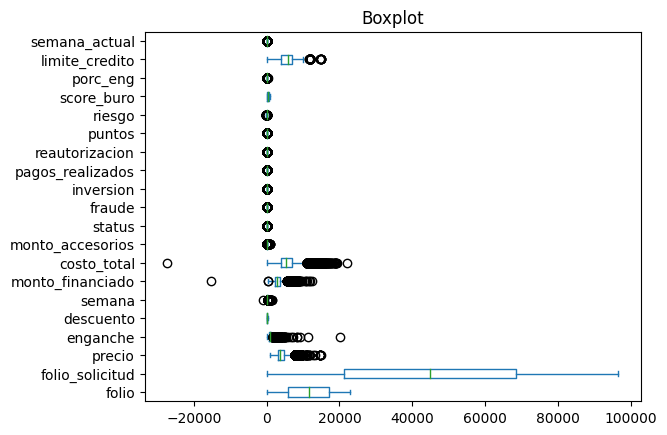

In [602]:
fig = plt.figure(figsize = (20, 10))
df.plot(kind="box", vert = False)
plt.title("Boxplot")
plt.show()

In [603]:
df = df.drop(df.columns[[1, 2, 3, 14, 15, 30]], axis=1)

In [604]:
df.corr()

<ipython-input-604-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,folio,precio,enganche,descuento,semana,monto_financiado,costo_total,monto_accesorios,status,fraude,inversion,pagos_realizados,reautorizacion,puntos,riesgo,score_buro,porc_eng,limite_credito,semana_actual
folio,1.000000,0.098971,0.124622,0.130377,0.094659,0.075446,0.027103,0.081637,-0.381641,-0.051590,-0.139744,-0.477863,-0.267134,-0.120736,0.352654,0.548206,0.069327,-0.386107,-0.819061
precio,0.098971,1.000000,0.678519,0.009883,0.672673,0.947080,0.872403,0.019097,-0.096183,0.060723,0.004445,0.017000,-0.057546,0.073077,-0.042888,0.080220,-0.011328,0.098488,-0.030421
enganche,0.124622,0.678519,1.000000,-0.025689,0.339912,0.408276,0.355694,0.031409,-0.032450,0.051645,-0.071798,-0.080730,-0.022209,-0.175815,0.272575,0.059764,0.676520,-0.316161,-0.094174
descuento,0.130377,0.009883,-0.025689,1.000000,-0.026317,0.024136,0.036940,-0.006212,-0.076093,-0.035743,0.240813,0.040920,-0.016730,-0.087252,0.036555,0.103998,-0.050813,-0.098742,-0.112215
semana,0.094659,0.672673,0.339912,-0.026317,1.000000,0.688111,0.411911,0.028635,0.143145,0.028683,0.036724,-0.133589,0.006011,0.084821,-0.091175,0.072555,-0.158246,0.141138,-0.189936
monto_financiado,0.075446,0.947080,0.408276,0.024136,0.688111,1.000000,0.929859,0.030831,-0.108464,0.052949,0.036326,0.052593,-0.062734,0.165852,-0.169037,0.076027,-0.307681,0.257862,-0.002362
costo_total,0.027103,0.872403,0.355694,0.036940,0.411911,0.929859,1.000000,0.063101,-0.195627,0.060782,0.024614,0.132380,-0.086438,0.159682,-0.171733,0.060079,-0.305885,0.258748,0.104572
monto_accesorios,0.081637,0.019097,0.031409,-0.006212,0.028635,0.030831,0.063101,1.000000,-0.043031,0.029445,-0.050677,-0.062232,-0.026971,-0.040392,0.078120,0.039010,0.029359,-0.060431,-0.059894
status,-0.381641,-0.096183,-0.032450,-0.076093,0.143145,-0.108464,-0.195627,-0.043031,1.000000,-0.155148,0.077710,0.251670,0.281953,0.062583,-0.143361,-0.240651,0.049292,0.089538,-0.006862
fraude,-0.051590,0.060723,0.051645,-0.035743,0.028683,0.052949,0.060782,0.029445,-0.155148,1.000000,-0.045808,-0.290140,-0.053387,-0.000143,0.033686,-0.024286,0.023888,-0.023531,0.131246


In [605]:
y=df
Limite_Superior= y.mean() + 3* y.std()
Limite_Inferior= y.mean() - 3 * y.std()
print("Limite Superior Permitido", Limite_Superior)
print("Limite Inferior Permitido", Limite_Inferior)

<ipython-input-605-3b2f7da30154>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  Limite_Superior= y.mean() + 3* y.std()
<ipython-input-605-3b2f7da30154>:2: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  Limite_Superior= y.mean() + 3* y.std()


Limite Superior Permitido folio               31323.107698
precio               8081.558082
enganche             2356.496845
descuento             478.215020
semana                541.287392
monto_financiado     6366.317810
costo_total         12857.588246
monto_accesorios      191.260880
status                  2.611178
fraude                  0.864131
inversion               1.511599
pagos_realizados       39.306132
reautorizacion          0.578086
puntos                 48.354233
riesgo                 58.456322
score_buro           1142.021000
porc_eng               45.711306
limite_credito      12331.577603
semana_actual          64.380898
dtype: float64
Limite Inferior Permitido folio              -8301.055796
precio               -87.484900
enganche            -503.622066
descuento           -321.263535
semana               -65.792692
monto_financiado    -214.044583
costo_total        -1458.203597
monto_accesorios    -164.333344
status                -0.100423
fraude            

<ipython-input-605-3b2f7da30154>:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  Limite_Inferior= y.mean() - 3 * y.std()
<ipython-input-605-3b2f7da30154>:3: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  Limite_Inferior= y.mean() - 3 * y.std()


In [606]:
df[['folio','precio','enganche','descuento','semana', 'monto_financiado', 'costo_total','monto_accesorios', 'status','pagos_realizados','puntos','riesgo','score_buro','porc_eng','limite_credito','semana_actual']]= df[['folio','precio','enganche','descuento','semana', 'monto_financiado', 'costo_total','monto_accesorios', 'status','pagos_realizados','puntos','riesgo','score_buro','porc_eng','limite_credito','semana_actual']][(y<=Limite_Superior)&(y>=Limite_Inferior)]
df.head()

<ipython-input-606-767f07089dbf>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df[['folio','precio','enganche','descuento','semana', 'monto_financiado', 'costo_total','monto_accesorios', 'status','pagos_realizados','puntos','riesgo','score_buro','porc_eng','limite_credito','semana_actual']]= df[['folio','precio','enganche','descuento','semana', 'monto_financiado', 'costo_total','monto_accesorios', 'status','pagos_realizados','puntos','riesgo','score_buro','porc_eng','limite_credito','semana_actual']][(y<=Limite_Superior)&(y>=Limite_Inferior)]


,folio,marca,modelo,plazo,precio,enganche,descuento,semana,monto_financiado,costo_total,...,score_buro,razones_buro,porc_eng,limite_credito,semana_actual,edad_cliente,cd_cliente,edo_cliente,cd_venta,edo_venta
0,3,ZTE,Blade A3 2020 RO B,26S,1949.0,780.0,0.0,81.0,1169.0,2106.0,...,0,mode,40.02,5000.0,26.0,23.0,0,0,Tantoyuca,Veracruz
1,4,MOTOROLA,LTE XT2097-12 E7I POWER Azul,13S,2999.0,1050.0,0.0,225.0,1949.0,2925.0,...,0,mode,35.01,6000.0,13.0,60.0,PUEBLA,PUE.,Heroica Puebla de Zaragoza,Puebla
2,5,ZTE,BLADE A3 2020 Gris,13S,1959.0,490.0,0.0,170.0,1469.0,2210.0,...,0,mode,25.01,0.0,NaN,58.0,TANTOYUCA,VER.,0,0
3,6,ZTE,BLADE A3 2020 Gris,13S,1959.0,490.0,0.0,170.0,1469.0,2210.0,...,0,mode,25.01,7000.0,13.0,42.0,AMXTLAN PUE,mode,Zacatlan,Puebla
4,7,MOTOROLA,G10 B,39S,4299.0,1075.0,0.0,178.0,3224.0,6942.0,...,0,mode,25.01,7000.0,NaN,33.0,TANTOYUCA,VER.,Tantoyuca,Veracruz


In [607]:
df = df.fillna(df.mean())

<ipython-input-607-04e87d67d337>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(df.mean())


In [608]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22735 entries, 0 to 22734
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   folio             22735 non-null  int64  
 1   marca             22735 non-null  object 
 2   modelo            22735 non-null  object 
 3   plazo             22735 non-null  object 
 4   precio            22735 non-null  float64
 5   enganche          22735 non-null  float64
 6   descuento         22735 non-null  float64
 7   semana            22735 non-null  float64
 8   monto_financiado  22735 non-null  float64
 9   costo_total       22735 non-null  float64
 10  monto_accesorios  22735 non-null  float64
 11  status            22735 non-null  float64
 12  fraude            22735 non-null  int64  
 13  empresa           22735 non-null  object 
 14  inversion         22735 non-null  int64  
 15  pagos_realizados  22735 non-null  float64
 16  reautorizacion    22735 non-null  int64 

In [609]:
df

,folio,marca,modelo,plazo,precio,enganche,descuento,semana,monto_financiado,costo_total,...,score_buro,razones_buro,porc_eng,limite_credito,semana_actual,edad_cliente,cd_cliente,edo_cliente,cd_venta,edo_venta
0,3,ZTE,Blade A3 2020 RO B,26S,1949.000000,780.00000,0.0,81.0,1169.00000,2106.000000,...,0,mode,40.02,5000.0,26.000000,23.0,0,0,Tantoyuca,Veracruz
1,4,MOTOROLA,LTE XT2097-12 E7I POWER Azul,13S,2999.000000,1050.00000,0.0,225.0,1949.00000,2925.000000,...,0,mode,35.01,6000.0,13.000000,60.0,PUEBLA,PUE.,Heroica Puebla de Zaragoza,Puebla
2,5,ZTE,BLADE A3 2020 Gris,13S,1959.000000,490.00000,0.0,170.0,1469.00000,2210.000000,...,0,mode,25.01,0.0,20.238285,58.0,TANTOYUCA,VER.,0,0
3,6,ZTE,BLADE A3 2020 Gris,13S,1959.000000,490.00000,0.0,170.0,1469.00000,2210.000000,...,0,mode,25.01,7000.0,13.000000,42.0,AMXTLAN PUE,mode,Zacatlan,Puebla
4,7,MOTOROLA,G10 B,39S,4299.000000,1075.00000,0.0,178.0,3224.00000,6942.000000,...,0,mode,25.01,7000.0,20.238285,33.0,TANTOYUCA,VER.,Tantoyuca,Veracruz
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22730,22967,Motorola,Moto E13,26S,3349.000000,297.00000,0.0,211.0,3052.00000,5486.000000,...,469,"K0,J0,D8,E2",8.87,10000.0,0.000000,22.0,OXKUTZCAB,YUC,Oxkutzcab,Yucatan
22731,22968,Motorola,Moto E22i,26S,4100.000000,1209.00000,0.0,200.0,2891.00000,5200.000000,...,502,"K0,J0,D8,E2",29.49,5000.0,0.000000,27.0,LEON,GTO,Leon,Guanajuato
22732,22969,Samsung,A13,26S,4849.000000,1152.00000,0.0,256.0,3697.00000,6656.000000,...,459,"K0,D7,F7,D8",23.76,4750.0,0.000000,36.0,AGUASCALIENTES,AGS,Aguascalientes,Aguascalientes
22733,22970,Samsung,A53 5G,39S,3969.204809,897.57116,0.0,386.0,3043.78942,5588.620361,...,699,"J0,G1,E0,E2",28.56,7000.0,0.000000,53.0,SOLEDAD DE GRACIANO SANCHEZ,SLP,Soledad De Graciano Sanchez,San Luis Potosi


In [610]:
df['status'].value_counts()

1.000000    17086
2.000000     5495
1.243346      154
Name: status, dtype: int64

In [611]:
unico = np.unique(df['status'])
unico

array([1.        , 1.24334618, 2.        ])

In [612]:
df['status'] = df['status'].apply(lambda x: 0 if x > 1 else x)
df

,folio,marca,modelo,plazo,precio,enganche,descuento,semana,monto_financiado,costo_total,...,score_buro,razones_buro,porc_eng,limite_credito,semana_actual,edad_cliente,cd_cliente,edo_cliente,cd_venta,edo_venta
0,3,ZTE,Blade A3 2020 RO B,26S,1949.000000,780.00000,0.0,81.0,1169.00000,2106.000000,...,0,mode,40.02,5000.0,26.000000,23.0,0,0,Tantoyuca,Veracruz
1,4,MOTOROLA,LTE XT2097-12 E7I POWER Azul,13S,2999.000000,1050.00000,0.0,225.0,1949.00000,2925.000000,...,0,mode,35.01,6000.0,13.000000,60.0,PUEBLA,PUE.,Heroica Puebla de Zaragoza,Puebla
2,5,ZTE,BLADE A3 2020 Gris,13S,1959.000000,490.00000,0.0,170.0,1469.00000,2210.000000,...,0,mode,25.01,0.0,20.238285,58.0,TANTOYUCA,VER.,0,0
3,6,ZTE,BLADE A3 2020 Gris,13S,1959.000000,490.00000,0.0,170.0,1469.00000,2210.000000,...,0,mode,25.01,7000.0,13.000000,42.0,AMXTLAN PUE,mode,Zacatlan,Puebla
4,7,MOTOROLA,G10 B,39S,4299.000000,1075.00000,0.0,178.0,3224.00000,6942.000000,...,0,mode,25.01,7000.0,20.238285,33.0,TANTOYUCA,VER.,Tantoyuca,Veracruz
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22730,22967,Motorola,Moto E13,26S,3349.000000,297.00000,0.0,211.0,3052.00000,5486.000000,...,469,"K0,J0,D8,E2",8.87,10000.0,0.000000,22.0,OXKUTZCAB,YUC,Oxkutzcab,Yucatan
22731,22968,Motorola,Moto E22i,26S,4100.000000,1209.00000,0.0,200.0,2891.00000,5200.000000,...,502,"K0,J0,D8,E2",29.49,5000.0,0.000000,27.0,LEON,GTO,Leon,Guanajuato
22732,22969,Samsung,A13,26S,4849.000000,1152.00000,0.0,256.0,3697.00000,6656.000000,...,459,"K0,D7,F7,D8",23.76,4750.0,0.000000,36.0,AGUASCALIENTES,AGS,Aguascalientes,Aguascalientes
22733,22970,Samsung,A53 5G,39S,3969.204809,897.57116,0.0,386.0,3043.78942,5588.620361,...,699,"J0,G1,E0,E2",28.56,7000.0,0.000000,53.0,SOLEDAD DE GRACIANO SANCHEZ,SLP,Soledad De Graciano Sanchez,San Luis Potosi


In [613]:
df['status'].value_counts()

1.0    17086
0.0     5649
Name: status, dtype: int64

In [614]:
df['modelo'].value_counts()

A03s                             2231
A03                              1715
A13                              1089
A04                              1039
A04E                              817
                                 ... 
LTE 5002B 1B 32GB Verde             1
GALAXY A32 4+128 GB VIOLETA B       1
K62 B AZUL                          1
5007A 1V 2020 Verde                 1
4G 6002A 1V  Gris Iu                1
Name: modelo, Length: 366, dtype: int64

In [615]:
df['marca'].value_counts()

Samsung         8991
SAMSUNG         3524
MOTOROLA        3078
ZTE             1948
Motorola        1658
NOKIA           1121
TECNO MOBILE     833
Hisense          371
HISENSE          270
Nokia            262
ALCATEL          215
TCL              113
Alcatel          101
Lanix             90
VIVO              60
Vivo              45
LG                20
WIKO               9
NYX                7
B2M                4
KODAK              3
RT                 3
LANIX              2
INCO               2
Huawei             1
SENWA              1
alcatel            1
Senwa              1
TECHPAD            1
Name: marca, dtype: int64

In [616]:
df['marca'] = df['marca'].replace(["SAMSUNG"], "Samsung")

In [617]:
df['marca'] = df['marca'].apply(lambda x: 1 if x == "Samsung" else x)

In [618]:
df['marca'] = df['marca'].apply(lambda x: 0 if x != 1 else x)

In [619]:
df['marca'].value_counts()

1    12515
0    10220
Name: marca, dtype: int64

##Modelo 1

In [620]:
Vars_Indep= df[['precio', 'enganche']]
Var_Dep= df['fraude']

In [621]:
x= Vars_Indep
y= Var_Dep

In [622]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state =None)

In [623]:
escalar = StandardScaler()

In [624]:
x_train = escalar.fit_transform(x_train)
x_test = escalar.transform(x_test)

In [625]:
from sklearn.linear_model import LogisticRegression
algoritmo = LogisticRegression()

In [626]:
algoritmo.fit(x_train, y_train)

LogisticRegression()

In [627]:
y_pred = algoritmo.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [628]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

matriz1 = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz1)

precision1 = precision_score(y_test, y_pred, average="binary", pos_label=1)
print('Precisión del modelo:')
print(precision1)

exactitud1 = accuracy_score(y_test, y_pred)
print('Exactitud del modelo:')
print(exactitud1)

sensibilidad1 = recall_score(y_test, y_pred, average="binary", pos_label=1)
print('Sensibilidad del modelo:')
print(sensibilidad1)

puntajef11 = f1_score(y_test, y_pred, average="binary", pos_label=1)
print('Puntaje F1 del modelo:')
print(puntajef11)

Matriz de Confusión:
[[6335    0]
 [ 486    0]]
Precisión del modelo:
0.0
Exactitud del modelo:
0.9287494502272394
Sensibilidad del modelo:
0.0
Puntaje F1 del modelo:
0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [629]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22735 entries, 0 to 22734
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   folio             22735 non-null  int64  
 1   marca             22735 non-null  int64  
 2   modelo            22735 non-null  object 
 3   plazo             22735 non-null  object 
 4   precio            22735 non-null  float64
 5   enganche          22735 non-null  float64
 6   descuento         22735 non-null  float64
 7   semana            22735 non-null  float64
 8   monto_financiado  22735 non-null  float64
 9   costo_total       22735 non-null  float64
 10  monto_accesorios  22735 non-null  float64
 11  status            22735 non-null  float64
 12  fraude            22735 non-null  int64  
 13  empresa           22735 non-null  object 
 14  inversion         22735 non-null  int64  
 15  pagos_realizados  22735 non-null  float64
 16  reautorizacion    22735 non-null  int64 

##Modelo 2

In [630]:
Vars_Indep= df[['precio', 'enganche', 'descuento']]
Var_Dep= df['inversion']

In [631]:
x= Vars_Indep
y= Var_Dep

In [632]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state =None)

In [633]:
escalar = StandardScaler()

In [634]:
x_train = escalar.fit_transform(x_train)
x_test = escalar.transform(x_test)

In [635]:
from sklearn.linear_model import LogisticRegression
algoritmo = LogisticRegression()

In [636]:
algoritmo.fit(x_train, y_train)

LogisticRegression()

In [637]:
y_pred = algoritmo.predict(x_test)
y_pred

array([1, 0, 0, ..., 0, 0, 0])

In [638]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

matriz2 = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz2)

precision2 = precision_score(y_test, y_pred, average="binary", pos_label=1)
print('Precisión del modelo:')
print(precision2)

exactitud2 = accuracy_score(y_test, y_pred)
print('Exactitud del modelo:')
print(exactitud2)

sensibilidad2 = recall_score(y_test, y_pred, average="binary", pos_label=1)
print('Sensibilidad del modelo:')
print(sensibilidad2)

puntajef12 = f1_score(y_test, y_pred, average="binary", pos_label=1)
print('Puntaje F1 del modelo:')
print(puntajef12)

Matriz de Confusión:
[[5046  159]
 [1512  104]]
Precisión del modelo:
0.39543726235741444
Exactitud del modelo:
0.7550212578800762
Sensibilidad del modelo:
0.06435643564356436
Puntaje F1 del modelo:
0.11069717935071846


In [639]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22735 entries, 0 to 22734
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   folio             22735 non-null  int64  
 1   marca             22735 non-null  int64  
 2   modelo            22735 non-null  object 
 3   plazo             22735 non-null  object 
 4   precio            22735 non-null  float64
 5   enganche          22735 non-null  float64
 6   descuento         22735 non-null  float64
 7   semana            22735 non-null  float64
 8   monto_financiado  22735 non-null  float64
 9   costo_total       22735 non-null  float64
 10  monto_accesorios  22735 non-null  float64
 11  status            22735 non-null  float64
 12  fraude            22735 non-null  int64  
 13  empresa           22735 non-null  object 
 14  inversion         22735 non-null  int64  
 15  pagos_realizados  22735 non-null  float64
 16  reautorizacion    22735 non-null  int64 

##Modelo 3

In [640]:
Vars_Indep= df[['monto_financiado', 'costo_total', 'descuento']]
Var_Dep= df['reautorizacion']

In [641]:
x= Vars_Indep
y= Var_Dep

In [642]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state =None)

In [643]:
escalar = StandardScaler()

In [644]:
x_train = escalar.fit_transform(x_train)
x_test = escalar.transform(x_test)

In [645]:
from sklearn.linear_model import LogisticRegression
algoritmo = LogisticRegression()

In [646]:
algoritmo.fit(x_train, y_train)

LogisticRegression()

In [647]:
y_pred = algoritmo.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [648]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

matriz3 = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz3)

precision3 = precision_score(y_test, y_pred, average="binary", pos_label=1)
print('Precisión del modelo:')
print(precision3)

exactitud3 = accuracy_score(y_test, y_pred)
print('Exactitud del modelo:')
print(exactitud3)

sensibilidad3 = recall_score(y_test, y_pred, average="binary", pos_label=1)
print('Sensibilidad del modelo:')
print(sensibilidad3)

puntajef13 = f1_score(y_test, y_pred, average="binary", pos_label=1)
print('Puntaje F1 del modelo:')
print(puntajef13)

Matriz de Confusión:
[[6583    0]
 [ 238    0]]
Precisión del modelo:
0.0
Exactitud del modelo:
0.9651077554610761
Sensibilidad del modelo:
0.0
Puntaje F1 del modelo:
0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [649]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22735 entries, 0 to 22734
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   folio             22735 non-null  int64  
 1   marca             22735 non-null  int64  
 2   modelo            22735 non-null  object 
 3   plazo             22735 non-null  object 
 4   precio            22735 non-null  float64
 5   enganche          22735 non-null  float64
 6   descuento         22735 non-null  float64
 7   semana            22735 non-null  float64
 8   monto_financiado  22735 non-null  float64
 9   costo_total       22735 non-null  float64
 10  monto_accesorios  22735 non-null  float64
 11  status            22735 non-null  float64
 12  fraude            22735 non-null  int64  
 13  empresa           22735 non-null  object 
 14  inversion         22735 non-null  int64  
 15  pagos_realizados  22735 non-null  float64
 16  reautorizacion    22735 non-null  int64 

##Modelo 4

In [650]:
Vars_Indep= df[['pagos_realizados', 'riesgo', 'limite_credito']]
Var_Dep= df['status']

In [651]:
x= Vars_Indep
y= Var_Dep

In [652]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state =None)

In [653]:
escalar = StandardScaler()

In [654]:
x_train = escalar.fit_transform(x_train)
x_test = escalar.transform(x_test)

In [655]:
from sklearn.linear_model import LogisticRegression
algoritmo = LogisticRegression()

In [656]:
algoritmo.fit(x_train, y_train)

LogisticRegression()

In [657]:
y_pred = algoritmo.predict(x_test)
y_pred

array([1., 1., 1., ..., 1., 1., 1.])

In [658]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

matriz4 = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz4)

precision4 = precision_score(y_test, y_pred, average="binary", pos_label=1)
print('Precisión del modelo:')
print(precision4)

exactitud4 = accuracy_score(y_test, y_pred)
print('Exactitud del modelo:')
print(exactitud4)

sensibilidad4 = recall_score(y_test, y_pred, average="binary", pos_label=1)
print('Sensibilidad del modelo:')
print(sensibilidad4)

puntajef14 = f1_score(y_test, y_pred, average="binary", pos_label=1)
print('Puntaje F1 del modelo:')
print(puntajef14)

Matriz de Confusión:
[[ 216 1434]
 [ 263 4908]]
Precisión del modelo:
0.7738883632923368
Exactitud del modelo:
0.751209500073303
Sensibilidad del modelo:
0.9491394314445949
Puntaje F1 del modelo:
0.8526014071050118


##Modelo 5

In [659]:
Vars_Indep= df[['precio', 'enganche', 'descuento']]
Var_Dep= df['inversion']

In [660]:
x= Vars_Indep
y= Var_Dep

In [661]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state =None)

In [662]:
escalar = StandardScaler()

In [663]:
x_train = escalar.fit_transform(x_train)
x_test = escalar.transform(x_test)

In [664]:
from sklearn.linear_model import LogisticRegression
algoritmo = LogisticRegression()

In [665]:
algoritmo.fit(x_train, y_train)

LogisticRegression()

In [666]:
y_pred = algoritmo.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [667]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

matriz5 = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz5)

precision5 = precision_score(y_test, y_pred, average="binary", pos_label=1)
print('Precisión del modelo:')
print(precision5)

exactitud5 = accuracy_score(y_test, y_pred)
print('Exactitud del modelo:')
print(exactitud5)

sensibilidad5 = recall_score(y_test, y_pred, average="binary", pos_label=1)
print('Sensibilidad del modelo:')
print(sensibilidad5)

puntajef15 = f1_score(y_test, y_pred, average="binary", pos_label=1)
print('Puntaje F1 del modelo:')
print(puntajef15)

Matriz de Confusión:
[[5017  173]
 [1530  101]]
Precisión del modelo:
0.3686131386861314
Exactitud del modelo:
0.7503298636563553
Sensibilidad del modelo:
0.061925199264255056
Puntaje F1 del modelo:
0.10603674540682415


In [668]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22735 entries, 0 to 22734
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   folio             22735 non-null  int64  
 1   marca             22735 non-null  int64  
 2   modelo            22735 non-null  object 
 3   plazo             22735 non-null  object 
 4   precio            22735 non-null  float64
 5   enganche          22735 non-null  float64
 6   descuento         22735 non-null  float64
 7   semana            22735 non-null  float64
 8   monto_financiado  22735 non-null  float64
 9   costo_total       22735 non-null  float64
 10  monto_accesorios  22735 non-null  float64
 11  status            22735 non-null  float64
 12  fraude            22735 non-null  int64  
 13  empresa           22735 non-null  object 
 14  inversion         22735 non-null  int64  
 15  pagos_realizados  22735 non-null  float64
 16  reautorizacion    22735 non-null  int64 

##Modelo 6

In [669]:
Vars_Indep= df[['enganche', 'monto_financiado', 'riesgo']]
Var_Dep= df['inversion']

In [670]:
x= Vars_Indep
y= Var_Dep

In [671]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state =None)

In [672]:
escalar = StandardScaler()

In [673]:
x_train = escalar.fit_transform(x_train)
x_test = escalar.transform(x_test)

In [674]:
from sklearn.linear_model import LogisticRegression
algoritmo = LogisticRegression()

In [675]:
algoritmo.fit(x_train, y_train)

LogisticRegression()

In [676]:
y_pred = algoritmo.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [677]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

matriz6 = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz6)

precision6 = precision_score(y_test, y_pred, average="binary", pos_label=1)
print('Precisión del modelo:')
print(precision6)

exactitud6 = accuracy_score(y_test, y_pred)
print('Exactitud del modelo:')
print(exactitud6)

sensibilidad6 = recall_score(y_test, y_pred, average="binary", pos_label=1)
print('Sensibilidad del modelo:')
print(sensibilidad6)

puntajef16 = f1_score(y_test, y_pred, average="binary", pos_label=1)
print('Puntaje F1 del modelo:')
print(puntajef16)

Matriz de Confusión:
[[5229    0]
 [1592    0]]
Precisión del modelo:
0.0
Exactitud del modelo:
0.7666031373698872
Sensibilidad del modelo:
0.0
Puntaje F1 del modelo:
0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [678]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22735 entries, 0 to 22734
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   folio             22735 non-null  int64  
 1   marca             22735 non-null  int64  
 2   modelo            22735 non-null  object 
 3   plazo             22735 non-null  object 
 4   precio            22735 non-null  float64
 5   enganche          22735 non-null  float64
 6   descuento         22735 non-null  float64
 7   semana            22735 non-null  float64
 8   monto_financiado  22735 non-null  float64
 9   costo_total       22735 non-null  float64
 10  monto_accesorios  22735 non-null  float64
 11  status            22735 non-null  float64
 12  fraude            22735 non-null  int64  
 13  empresa           22735 non-null  object 
 14  inversion         22735 non-null  int64  
 15  pagos_realizados  22735 non-null  float64
 16  reautorizacion    22735 non-null  int64 

##Modelo 7

In [679]:
Vars_Indep= df[['precio', 'enganche', 'descuento']]
Var_Dep= df['marca']

In [680]:
x= Vars_Indep
y= Var_Dep

In [681]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state =None)

In [682]:
escalar = StandardScaler()

In [683]:
x_train = escalar.fit_transform(x_train)
x_test = escalar.transform(x_test)

In [684]:
from sklearn.linear_model import LogisticRegression
algoritmo = LogisticRegression()

In [685]:
algoritmo.fit(x_train, y_train)

LogisticRegression()

In [686]:
y_pred = algoritmo.predict(x_test)
y_pred

array([1, 1, 1, ..., 1, 1, 0])

In [687]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

matriz7 = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz7)

precision7 = precision_score(y_test, y_pred, average="binary", pos_label=1)
print('Precisión del modelo:')
print(precision7)

exactitud7 = accuracy_score(y_test, y_pred)
print('Exactitud del modelo:')
print(exactitud7)

sensibilidad7 = recall_score(y_test, y_pred, average="binary", pos_label=1)
print('Sensibilidad del modelo:')
print(sensibilidad7)

puntajef17 = f1_score(y_test, y_pred, average="binary", pos_label=1)
print('Puntaje F1 del modelo:')
print(puntajef17)

Matriz de Confusión:
[[1793 1285]
 [1235 2508]]
Precisión del modelo:
0.6612180332190878
Exactitud del modelo:
0.6305527048819821
Sensibilidad del modelo:
0.6700507614213198
Puntaje F1 del modelo:
0.6656050955414012


##Modelo 8

In [688]:
Vars_Indep= df[['enganche', 'monto_financiado', 'riesgo']]
Var_Dep= df['marca']

In [689]:
x= Vars_Indep
y= Var_Dep

In [690]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state =None)

In [691]:
escalar = StandardScaler()

In [692]:
x_train = escalar.fit_transform(x_train)
x_test = escalar.transform(x_test)

In [693]:
from sklearn.linear_model import LogisticRegression
algoritmo = LogisticRegression()

In [694]:
algoritmo.fit(x_train, y_train)

LogisticRegression()

In [695]:
y_pred = algoritmo.predict(x_test)
y_pred

array([1, 0, 0, ..., 1, 0, 1])

In [696]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

matriz8 = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz8)

precision8 = precision_score(y_test, y_pred, average="binary", pos_label=1)
print('Precisión del modelo:')
print(precision8)

exactitud8 = accuracy_score(y_test, y_pred)
print('Exactitud del modelo:')
print(exactitud8)

sensibilidad8 = recall_score(y_test, y_pred, average="binary", pos_label=1)
print('Sensibilidad del modelo:')
print(sensibilidad8)

puntajef18 = f1_score(y_test, y_pred, average="binary", pos_label=1)
print('Puntaje F1 del modelo:')
print(puntajef18)

Matriz de Confusión:
[[1441 1669]
 [ 852 2859]]
Precisión del modelo:
0.631404593639576
Exactitud del modelo:
0.6304060988124909
Sensibilidad del modelo:
0.7704122877930477
Puntaje F1 del modelo:
0.6940162641097221


In [697]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22735 entries, 0 to 22734
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   folio             22735 non-null  int64  
 1   marca             22735 non-null  int64  
 2   modelo            22735 non-null  object 
 3   plazo             22735 non-null  object 
 4   precio            22735 non-null  float64
 5   enganche          22735 non-null  float64
 6   descuento         22735 non-null  float64
 7   semana            22735 non-null  float64
 8   monto_financiado  22735 non-null  float64
 9   costo_total       22735 non-null  float64
 10  monto_accesorios  22735 non-null  float64
 11  status            22735 non-null  float64
 12  fraude            22735 non-null  int64  
 13  empresa           22735 non-null  object 
 14  inversion         22735 non-null  int64  
 15  pagos_realizados  22735 non-null  float64
 16  reautorizacion    22735 non-null  int64 

##Modelo 9

In [698]:
Vars_Indep= df[['costo_total', 'limite_credito', 'riesgo']]
Var_Dep= df['reautorizacion']

In [699]:
x= Vars_Indep
y= Var_Dep

In [700]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state =None)

In [701]:
escalar = StandardScaler()

In [702]:
x_train = escalar.fit_transform(x_train)
x_test = escalar.transform(x_test)

In [703]:
from sklearn.linear_model import LogisticRegression
algoritmo = LogisticRegression()

In [704]:
algoritmo.fit(x_train, y_train)

LogisticRegression()

In [705]:
y_pred = algoritmo.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [706]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

matriz9 = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz9)

precision9 = precision_score(y_test, y_pred, average="binary", pos_label=1)
print('Precisión del modelo:')
print(precision9)

exactitud9 = accuracy_score(y_test, y_pred)
print('Exactitud del modelo:')
print(exactitud9)

sensibilidad9 = recall_score(y_test, y_pred, average="binary", pos_label=1)
print('Sensibilidad del modelo:')
print(sensibilidad9)

puntajef19 = f1_score(y_test, y_pred, average="binary", pos_label=1)
print('Puntaje F1 del modelo:')
print(puntajef19)

Matriz de Confusión:
[[6578    0]
 [ 243    0]]
Precisión del modelo:
0.0
Exactitud del modelo:
0.9643747251136197
Sensibilidad del modelo:
0.0
Puntaje F1 del modelo:
0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [707]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22735 entries, 0 to 22734
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   folio             22735 non-null  int64  
 1   marca             22735 non-null  int64  
 2   modelo            22735 non-null  object 
 3   plazo             22735 non-null  object 
 4   precio            22735 non-null  float64
 5   enganche          22735 non-null  float64
 6   descuento         22735 non-null  float64
 7   semana            22735 non-null  float64
 8   monto_financiado  22735 non-null  float64
 9   costo_total       22735 non-null  float64
 10  monto_accesorios  22735 non-null  float64
 11  status            22735 non-null  float64
 12  fraude            22735 non-null  int64  
 13  empresa           22735 non-null  object 
 14  inversion         22735 non-null  int64  
 15  pagos_realizados  22735 non-null  float64
 16  reautorizacion    22735 non-null  int64 

##Modelo 10

In [708]:
Vars_Indep= df[['descuento', 'limite_credito', 'monto_accesorios']]
Var_Dep= df['inversion']

In [709]:
x= Vars_Indep
y= Var_Dep

In [710]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state =None)

In [711]:
escalar = StandardScaler()

In [712]:
x_train = escalar.fit_transform(x_train)
x_test = escalar.transform(x_test)

In [713]:
from sklearn.linear_model import LogisticRegression
algoritmo = LogisticRegression()

In [714]:
algoritmo.fit(x_train, y_train)

LogisticRegression()

In [715]:
y_pred = algoritmo.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [716]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

matriz0 = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz0)

precision0 = precision_score(y_test, y_pred, average="binary", pos_label=1)
print('Precisión del modelo:')
print(precision0)

exactitud0 = accuracy_score(y_test, y_pred)
print('Exactitud del modelo:')
print(exactitud0)

sensibilidad0 = recall_score(y_test, y_pred, average="binary", pos_label=1)
print('Sensibilidad del modelo:')
print(sensibilidad0)

puntajef10 = f1_score(y_test, y_pred, average="binary", pos_label=1)
print('Puntaje F1 del modelo:')
print(puntajef10)

Matriz de Confusión:
[[5097  123]
 [1514   87]]
Precisión del modelo:
0.4142857142857143
Exactitud del modelo:
0.7600058642427796
Sensibilidad del modelo:
0.05434103685196752
Puntaje F1 del modelo:
0.09607951408061845


In [718]:
coeficientes = pd.DataFrame({'Precision': [precision1, precision2, precision3, precision4, precision5, precision6, precision7, precision8, precision9, precision0],
                             'Exactitud': [exactitud1, exactitud2, exactitud3, exactitud4, exactitud5, exactitud6, exactitud7, exactitud8, exactitud9, exactitud0],
                             'Sensibilidad': [sensibilidad1, sensibilidad2, sensibilidad3, sensibilidad4, sensibilidad5, sensibilidad6, sensibilidad7, sensibilidad8, sensibilidad9, sensibilidad0],})
indice = ['Modelo 1', 'Modelo 2', 'Modelo 3', 'Modelo 4', 'Modelo 5', 'Modelo 6', 'Modelo 7', 'Modelo 8', 'Modelo 9', 'Modelo 10']
coeficientes.index = indice
coeficientes

,Precision,Exactitud,Sensibilidad
Modelo 1,0.000000,0.928749,0.000000
Modelo 2,0.395437,0.755021,0.064356
Modelo 3,0.000000,0.965108,0.000000
Modelo 4,0.773888,0.751210,0.949139
Modelo 5,0.368613,0.750330,0.061925
Modelo 6,0.000000,0.766603,0.000000
Modelo 7,0.661218,0.630553,0.670051
Modelo 8,0.631405,0.630406,0.770412
Modelo 9,0.000000,0.964375,0.000000
Modelo 10,0.414286,0.760006,0.054341
